In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import cv2

In [6]:
banana_color = cv2.imread('C:/Spring2021/BigData_ML/MyProject/data/banana.jpg')

In [7]:
guava_color = cv2.imread('C:/Spring2021/BigData_ML/MyProject/data/guava.jpg')

In [8]:
pineapple_color = cv2.imread('C:/Spring2021/BigData_ML/MyProject/data/pineapple.jpg')

(0.0, 1.0, 0.0, 1.0)

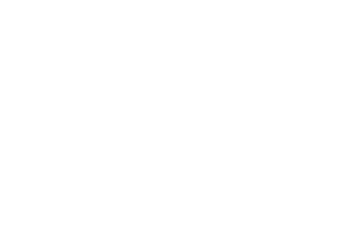

In [9]:
plt.axis('off')

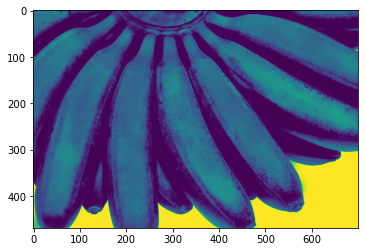

In [11]:
plt.imshow(banana_color[:,:,0])

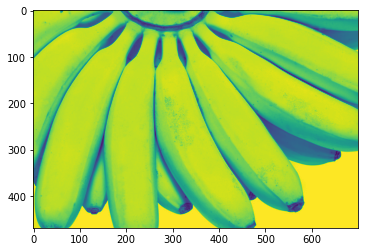

In [12]:
plt.imshow(banana_color[:,:,1])

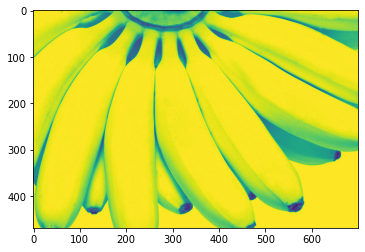

In [13]:
plt.imshow(banana_color[:,:,2])

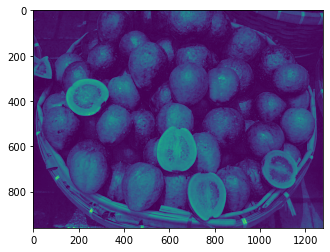

In [14]:
plt.imshow(guava_color[:,:,0])

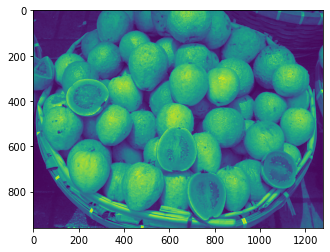

In [15]:
plt.imshow(guava_color[:,:,1])

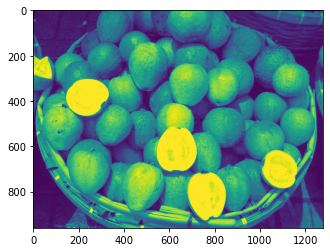

In [16]:
plt.imshow(guava_color[:,:,2])

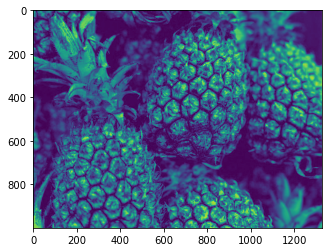

In [17]:
plt.imshow(pineapple_color[:,:,0])

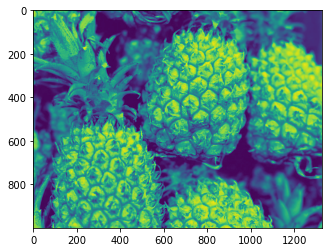

In [18]:
plt.imshow(pineapple_color[:,:,1])

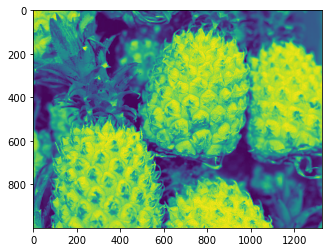

In [19]:
plt.imshow(pineapple_color[:,:,2])

## Generate Dataframe from Gray scale images either by sliding technique or non-sliding. Here I take a block of 8*8 values and create a feature space of 64 columns

In [22]:
fruit_gray = cv2.cvtColor(banana_color, cv2.COLOR_BGR2GRAY)
heightcG, widthcG = fruit_gray.shape
std_height = 256

In [20]:
def resize_get_width(heightcG,widthcG):
    aspect_ratio = widthcG/heightcG
    new_fruit_width = aspect_ratio*std_height
    return round(new_fruit_width)

In [23]:
def width_divisibilityBy8(height_fruit,width_fruit):
    new_fruit_width = resize_get_width(height_fruit, width_fruit)
    dimension_rem = new_fruit_width % 8    
    if dimension_rem == 0:
     return new_fruit_width   
    elif dimension_rem >=5:
         new_fruit_width = new_fruit_width + (8-dimension_rem)
    else:
        new_fruit_width = new_fruit_width-dimension_rem
    return new_fruit_width   

In [24]:
new_fruit_width = width_divisibilityBy8(heightcG,widthcG)
resized_fruit = cv2.resize(fruit_gray, dsize=(new_fruit_width, std_height), interpolation=cv2.INTER_CUBIC)
heightc, widthc = resized_fruit.shape
cc = round((heightc)*(widthc)/64)
flatc = np.ones((cc, 65), np.uint8)
k = 0 

In [25]:
for i in range(0,heightc,8):  
    for j in range(0,widthc,8):
        crop_tmp1 = resized_fruit[i:i+8,j:j+8]
        flatc[k,0:64] = crop_tmp1.flatten()
        k = k + 1
fspaceC = pd.DataFrame(flatc)
#fspaceC.to_csv('image0_dummy.csv', index=False)

## Histograms

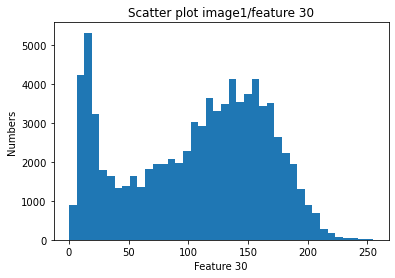

In [27]:
data_banana = pd.read_csv('C:/Spring2021/BigData_ML/MyProject/data/image0.csv')
data_guava = pd.read_csv('C:/Spring2021/BigData_ML/MyProject/data/image1.csv')
data_pineapple = pd.read_csv('C:/Spring2021/BigData_ML/MyProject/data/image2.csv')
f10=data_banana['10']
f30=data_guava['30']
p15=data_pineapple['15']
plt.xlabel('Feature 30')
plt.ylabel('Numbers')
plt.title('Scatter plot image1/feature 30')
nbins = 40
plt.hist(f30,nbins)
plt.show()

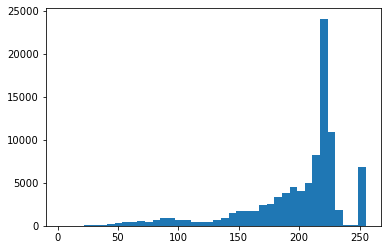

In [28]:
plt.hist(f10,nbins)
plt.show()

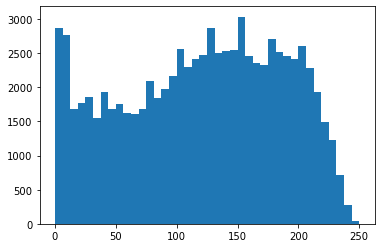

In [29]:
plt.hist(p15,nbins)
plt.show()

## Scatter Plots

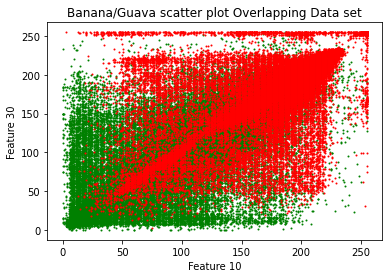

In [30]:
bf10=data_banana['10']
bf30=data_banana['30']
gf10=data_guava['10']
gf30=data_guava['30']
plt.xlabel('Feature 10')
plt.ylabel('Feature 30')
plt.scatter(gf10,gf30,color='green',s=1)
plt.scatter(bf10,bf30,color='red',s=1)
plt.title('Banana/Guava scatter plot Overlapping Data set')
plt.show()

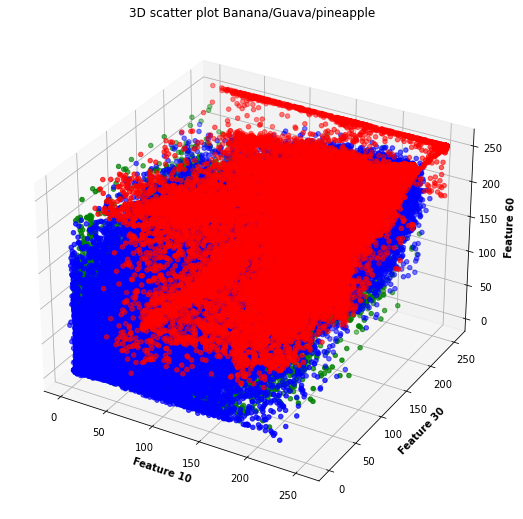

In [31]:
bf10=data_banana['10']
bf30=data_banana['30']
bf60=data_banana['60']
gf10=data_guava['10']
gf30=data_guava['30']
gf60=data_guava['60']
pf10=data_pineapple['10']
pf30=data_pineapple['30']
pf60=data_pineapple['60']

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111, projection='3d')
# Creating plot
ax.scatter3D(bf10, bf30, bf60,
                    marker ='o',c='r')
ax.scatter3D(gf10, gf30, gf60,
                    marker ='o',c='g')
ax.scatter3D(pf10, pf30, pf60,
                   marker ='o',c='b')
 
plt.title("3D scatter plot Banana/Guava/pineapple")
ax.set_xlabel('Feature 10', fontweight ='bold') 
ax.set_ylabel('Feature 30', fontweight ='bold') 
ax.set_zlabel('Feature 60', fontweight ='bold')
 
# show plot
plt.show()

## Mean Plots

(-3.2, 67.2, -10.0, 210.0)

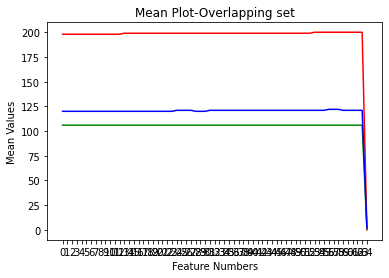

In [32]:
#calculating mean of all columns of all fruits
mean_banana = round(data_banana.mean())
mean_guava = round(data_guava.mean())
mean_pineapple = round(data_pineapple.mean())

#Plotting the mean values
plt.plot(mean_banana,color='r')
plt.plot(mean_guava,color='g')
plt.plot(mean_pineapple,color='b')

#setting the X and Y axis values
plt.title('Mean Plot-Overlapping set')
plt.xlabel('Feature Numbers')
plt.ylabel('Mean Values')
plt.axis('on')

## Standard Deviation Plot

banana 0     43.0
1     43.0
2     43.0
3     43.0
4     43.0
      ... 
60    43.0
61    43.0
62    43.0
63    43.0
64     0.0
Length: 65, dtype: float64
guava 0     58.0
1     58.0
2     58.0
3     58.0
4     58.0
      ... 
60    58.0
61    58.0
62    58.0
63    58.0
64     0.0
Length: 65, dtype: float64
poneapple 0     65.0
1     65.0
2     65.0
3     66.0
4     66.0
      ... 
60    66.0
61    66.0
62    66.0
63    66.0
64     0.0
Length: 65, dtype: float64


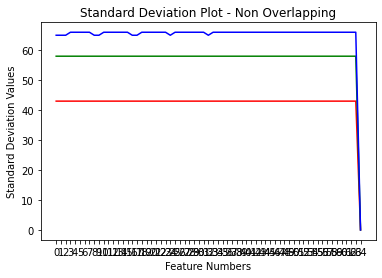

In [33]:
plt.title('Mean Plot-Overlapping set')
plt.xlabel('Feature Numbers')
plt.ylabel('Mean Values')
plt.axis('on')

#Calculating standard deviation of all columns for all fruits
std_banana = round(data_banana.std())
std_guava = round(data_guava.std())
std_pineapple = round(data_pineapple.std())

print('banana',std_banana)
print('guava',std_guava)
print('poneapple',std_pineapple)
#plotting STD values
plt.plot(std_banana, color='r')
plt.plot(std_guava, color='g')
plt.plot(std_pineapple, color='b')

#setting up X and Y axis values
plt.title('Standard Deviation Plot - Non Overlapping')
plt.xlabel('Feature Numbers')
plt.ylabel('Standard Deviation Values')
plt.show()